<a href="https://colab.research.google.com/github/JaydenPearlM/GameTikTacToe/blob/main/Abby_Jayden_Forest_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
#This project is for "Detecting Credit Card Fraud."

#Our Dataset "FraudShield: Detecting Credit Card Fraud with ML"
#Kaggle: "https://www.kaggle.com/code/pradeepyarava/
          #fraudshield-detecting-credit-card-fraud-with-ml/notebook"

In [31]:
#Add import data - Found on "FraudShield notebook page."
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import joblib

import math
import json
from pathlib import Path
import kagglehub
import os
import shutil
from datetime import datetime

from scipy.stats import zscore
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import plotly.graph_objects as go



from sklearn.preprocessing import PowerTransformer, LabelEncoder

from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek

from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
)
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    make_scorer
)

import shap

import warnings
warnings.filterwarnings('ignore')

Load the Dataset
'/content/fraudTest.csv'
*Make sure fraudTest.csv is in the Files on the left side*


In [32]:
file_path = '/content/fraudTest.csv'
data = pd.read_csv(file_path)
#print(file_path)

Data Cleaning the csv = Remove duplicates, Drop rows with 0 values, remove outliers, and Normalization.

In [33]:
def clean_dataset(file_path):
    # Load the dataset
    data = pd.read_csv(file_path)

    # Check for and remove duplicates
    if data.duplicated().any():
        data = data.drop_duplicates()
        print("Duplicates removed.")
    else:
        print("No duplicates found.")

    # Return the cleaned dataset
    return data

# File path
file_path = '/content/fraudTest.csv'

# Call the function and clean the data
cleaned_data = clean_dataset(file_path)

data = pd.read_csv(file_path)

# Z-Score method to remove outliers
from scipy.stats import zscore

# Compute Z-scores for numerical columns
z_scores = np.abs(data.select_dtypes(include=[np.number]).apply(zscore))

# Set a threshold, e.g., Z > 3
threshold = 3
outliers = (z_scores > threshold)

# Remove rows with any outliers
cleaned_data = data[~outliers.any(axis=1)]

print("Number of rows before removing outliers:", len(data))
print("Number of rows after removing outliers:", len(cleaned_data))

scaler = StandardScaler()

# Select numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Normalize the numerical columns
cleaned_data[numerical_columns] = scaler.fit_transform(cleaned_data[numerical_columns])


pd.set_option('display.max_columns', 50)  # Adjust the number as needed




cleaned_data.head()

No duplicates found.
Number of rows before removing outliers: 555719
Number of rows after removing outliers: 498865


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,-1.732540,2020-06-21 12:14:25,-0.166708,fraud_Kirlin and Sons,personal_care,-0.871225,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,-0.721155,-0.964887,0.685647,2.180579,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,-1.704523,-0.953636,0.664645,0.0
1,-1.732534,2020-06-21 12:14:33,-0.164817,fraud_Sporer-Keebler,personal_care,-0.458154,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,1.350514,0.340937,-1.581576,-0.346775,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,-1.704522,0.161021,-1.543652,0.0
2,-1.732528,2020-06-21 12:14:53,-0.164780,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,-0.283004,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,-1.382775,0.413309,1.254288,-0.087406,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,-1.704518,0.374260,1.202489,0.0
3,-1.732522,2020-06-21 12:15:15,-0.164790,fraud_Haley Group,misc_pos,0.004370,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,-0.586139,-2.073733,0.694593,0.066354,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,-1.704514,-2.009111,0.689035,0.0
4,-1.732515,2020-06-21 12:15:17,-0.164886,fraud_Johnston-Casper,travel,-0.866173,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,0.051018,1.148950,0.371969,-0.340525,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,-1.704513,1.284764,0.304985,0.0


In [34]:
# Ensure 'cleaned_data' is a valid DataFrame
df = cleaned_data.copy()

# Ensure the target variable is binary (if not already)
# Convert target to 0 and 1, assuming valid binary values might have been mis-transformed
df['is_fraud'] = df['is_fraud'].apply(lambda x: 1 if x > 0 else 0)

# Separate features (X) and target (y)
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Verify the distribution in training and testing sets
print(f"Training set fraud percentage: {y_train.mean() * 100:.2f}%")
print(f"Test set fraud percentage: {y_test.mean() * 100:.2f}%")

# Check detailed distribution in training set
print("Training set fraud distribution:")
print(y_train.value_counts(normalize=True) * 100)

# Check detailed distribution in test set
print("Test set fraud distribution:")
print(y_test.value_counts(normalize=True) * 100)

# Confirm unique values in the target variable
print("Unique values in target variable:", y.unique())

# Optional: Display the first few rows of cleaned data
cleaned_data.head()

Training set fraud percentage: 0.00%
Test set fraud percentage: 0.00%
Training set fraud distribution:
is_fraud
0    100.0
Name: proportion, dtype: float64
Test set fraud distribution:
is_fraud
0    100.0
Name: proportion, dtype: float64
Unique values in target variable: [0]


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,-1.732540,2020-06-21 12:14:25,-0.166708,fraud_Kirlin and Sons,personal_care,-0.871225,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,-0.721155,-0.964887,0.685647,2.180579,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,-1.704523,-0.953636,0.664645,0.0
1,-1.732534,2020-06-21 12:14:33,-0.164817,fraud_Sporer-Keebler,personal_care,-0.458154,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,1.350514,0.340937,-1.581576,-0.346775,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,-1.704522,0.161021,-1.543652,0.0
2,-1.732528,2020-06-21 12:14:53,-0.164780,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,-0.283004,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,-1.382775,0.413309,1.254288,-0.087406,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,-1.704518,0.374260,1.202489,0.0
3,-1.732522,2020-06-21 12:15:15,-0.164790,fraud_Haley Group,misc_pos,0.004370,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,-0.586139,-2.073733,0.694593,0.066354,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,-1.704514,-2.009111,0.689035,0.0
4,-1.732515,2020-06-21 12:15:17,-0.164886,fraud_Johnston-Casper,travel,-0.866173,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,0.051018,1.148950,0.371969,-0.340525,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,-1.704513,1.284764,0.304985,0.0


In [49]:
# Identify and encode categorical columns if necessary
label_encoder = LabelEncoder()
for column in cleaned_data.select_dtypes(include=['object']).columns:
    cleaned_data[column] = label_encoder.fit_transform(cleaned_data[column])

# Define your features and target
X = cleaned_data.drop('gender',  axis=1)  # Features
y = cleaned_data['is_fraud']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=15, random_state=20)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 100.00%
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     99773

    accuracy                           1.00     99773
   macro avg       1.00      1.00      1.00     99773
weighted avg       1.00      1.00      1.00     99773

Confusion Matrix:
[[99773]]


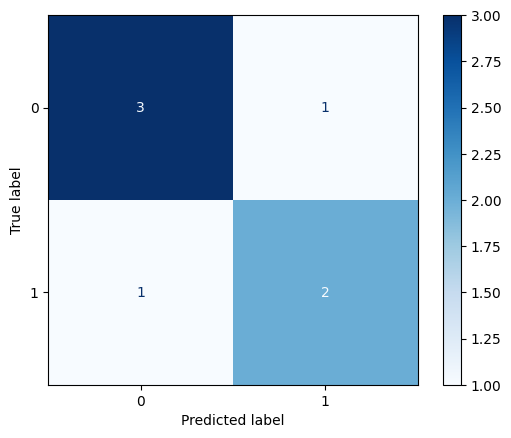

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
y_true = [1, 0, 1, 0, 0, 1, 0]  # Actual labels (e.g., 1 = fraud, 0 = non-fraud)
y_pred = [1, 0, 0, 0, 0, 1, 1]  # Predicted labels from the model

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Create and plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [50]:
# Count the total number of fraud and non-fraud cases
fraud_counts = cleaned_data['is_fraud'].value_counts()
print("Number of fraud and non-fraud cases:")
print(fraud_counts)

# Extract the number of fraud cases
num_fraud = fraud_counts.get(1, 0)  # Assuming fraud is encoded as '1'
num_non_fraud = fraud_counts.get(0, 0)  # Assuming non-fraud is encoded as '0'
print(f"Fraud cases: {num_fraud}")
print(f"Non-fraud cases: {num_non_fraud}")

# Calculate the percentage of fraud cases
total_cases = len(cleaned_data)
fraud_percentage = (num_fraud / total_cases) * 100
print(f"Percentage of fraud cases: {fraud_percentage:.2f}%")

# Optionally: Filter the rows where is_fraud == 1
fraud_cases = cleaned_data[cleaned_data['is_fraud'] == 1]
print("Example fraud cases:")
print(fraud_cases.head())


Number of fraud and non-fraud cases:
is_fraud
0.0    498865
Name: count, dtype: int64
Fraud cases: 0
Non-fraud cases: 498865
Percentage of fraud cases: 0.00%
Example fraud cases:
Empty DataFrame
Columns: [Unnamed: 0, trans_date_trans_time, cc_num, merchant, category, amt, first, last, gender, street, city, state, zip, lat, long, city_pop, job, dob, trans_num, unix_time, merch_lat, merch_long, is_fraud]
Index: []
